In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

[(0.0, 1246.0), (0.0, 2.0), Text(0.5, 1.0, 'Matching cost function')]

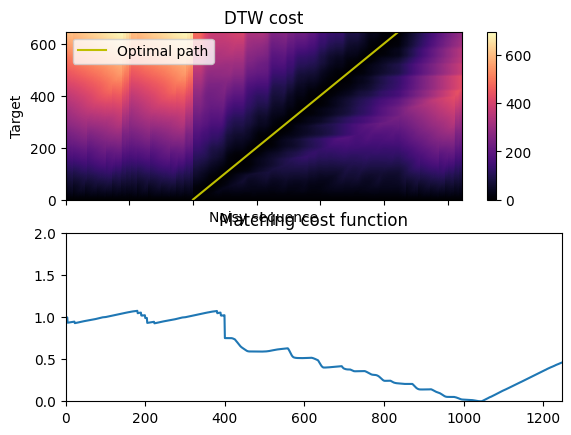

In [2]:
y, sr = librosa.load(librosa.ex('brahms'), offset=10, duration=15)
X = librosa.feature.chroma_cens(y=y, sr=sr)
noise = np.random.rand(X.shape[0], 200)
Y = np.concatenate((noise, noise, X, noise), axis=1)
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames',
                               ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2],
          title='Matching cost function')


In [3]:
y, sr = librosa.load(librosa.ex('brahms'), offset=10, duration=15)
print('Duration: {:.2f}s, {} samples'.format(y.shape[-1] / sr, y.size))
y, y.shape

Duration: 15.00s, 330750 samples


(array([ 0.00391813,  0.00716468,  0.01273571, ..., -0.02421105,
        -0.00592151,  0.00589834], dtype=float32),
 (330750,))

In [4]:
start, end = 7, 17
ipd.Audio(data=y[start*sr:end*sr], rate=sr)

In [5]:
X = librosa.feature.chroma_cens(y=y, sr=sr)
X.shape

(12, 646)

In [6]:
noise = np.random.rand(X.shape[0], 200)
Y = np.concatenate((noise, noise, X, noise), axis=1)
noise.shape, Y.shape

((12, 200), (12, 1246))

[(0.0, 1246.0), (0.0, 2.0), Text(0.5, 1.0, 'Matching cost function')]

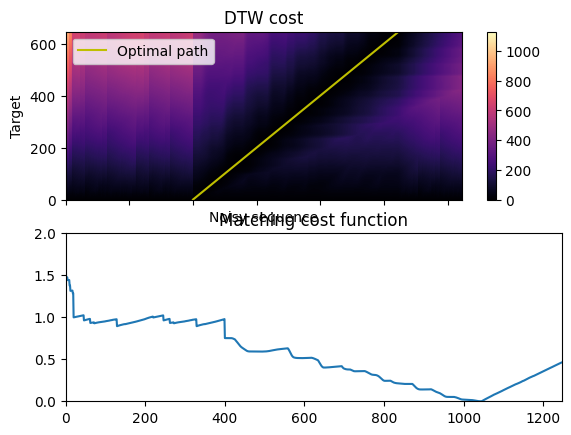

In [7]:
D, wp = librosa.sequence.dtw(X, Y, subseq=True)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames',
                               ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2],
          title='Matching cost function')

In [8]:
X.shape,  Y.shape, D.shape, wp.shape

((12, 646), (12, 1246), (646, 1246), (646, 2))

In [9]:
wp

array([[ 645, 1045],
       [ 644, 1044],
       [ 643, 1043],
       ...,
       [   2,  402],
       [   1,  401],
       [   0,  400]])

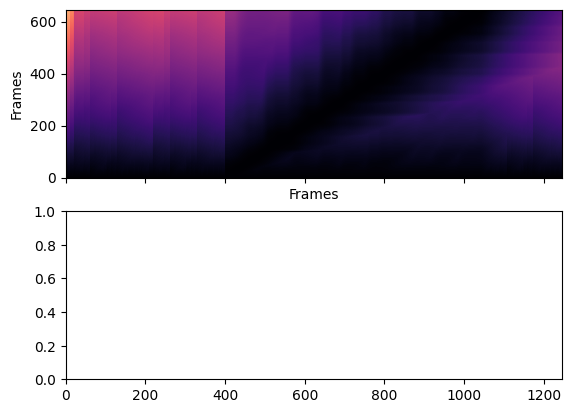

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames', ax=ax[0])

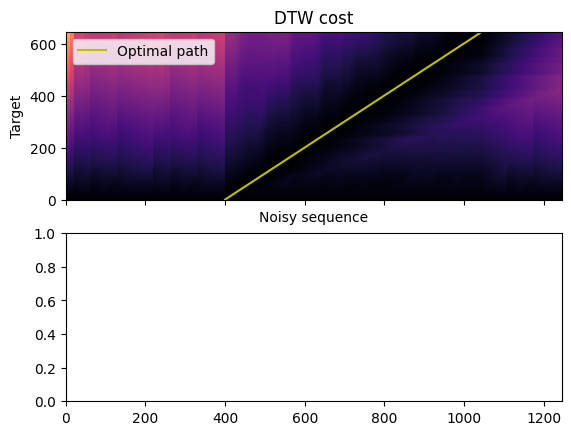

In [11]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames', ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()

In [12]:
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')
plt.show()

In [13]:
# Assuming frame1 and frame2 are two frames from different audio sequences
frame1 = np.array([0.1, 0.3, 0.2, 0.5])
frame2 = np.array([0.15, 0.4, 0.1, 0.6])

# Compute the Euclidean distance between the two frames
distance = np.sqrt(np.sum((frame1 - frame2) ** 2))

# Prepare the sequences for DTW
X = np.atleast_2d(frame1)
Y = np.atleast_2d(frame2)

# Compute the DTW cost matrix and optimal alignment path
D, wp = librosa.sequence.dtw(X, Y, subseq=True)

print("Distance between frame1 and frame2:", distance)
print("DTW cost matrix (D):\n", D)
print("Optimal alignment path (wp):\n", wp)


Distance between frame1 and frame2: 0.18027756377319948
DTW cost matrix (D):
 [[0.05 0.3  0.   0.5 ]
 [0.2  0.15 0.2  0.3 ]
 [0.25 0.35 0.25 0.6 ]
 [0.6  0.35 0.65 0.35]]
Optimal alignment path (wp):
 [[3 1]
 [2 0]
 [1 0]
 [0 0]]


In [14]:
X

array([[0.1, 0.3, 0.2, 0.5]])

In [15]:
frame1*(frame2.T)

array([0.015, 0.12 , 0.02 , 0.3  ])

In [16]:
np.dot(frame1, frame2)

0.455

# Chroma

array([[1.        , 0.95935106, 0.7387883 , ..., 0.00755056, 0.01836643,
        0.08567178],
       [0.68829525, 0.7543166 , 0.5998206 , ..., 0.01626088, 0.04049946,
        0.25854728],
       [0.9198347 , 1.        , 1.        , ..., 0.00449658, 0.02254797,
        0.22924349],
       ...,
       [0.6613098 , 0.8103733 , 0.6553525 , ..., 0.22221026, 0.25886995,
        0.24321483],
       [0.48657247, 0.6123315 , 0.83408636, ..., 1.        , 1.        ,
        1.        ],
       [0.66871876, 0.6947151 , 0.96532583, ..., 0.1949442 , 0.20514247,
        0.31011918]], dtype=float32)

In [ ]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y,  n_fft=2048, hop_length=512))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

In [29]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y, hop_length=2048, n_fft=4096))
librosa.feature.chroma_stft(S=S, sr=sr)


array([[0.9628184 , 0.8930268 , 0.98463976, ..., 0.2806557 , 0.19658256,
        0.23862481],
       [0.78569907, 0.7203501 , 0.8787044 , ..., 0.4973577 , 0.30358306,
        0.39168596],
       [1.        , 0.83364546, 0.9833589 , ..., 0.2240913 , 0.12292899,
        0.30329743],
       ...,
       [0.81289905, 0.76199454, 0.7641102 , ..., 0.33082363, 0.26764494,
        0.3917184 ],
       [0.72680277, 0.8376102 , 0.82086384, ..., 1.        , 1.        ,
        1.        ],
       [0.8095517 , 0.8597191 , 1.        , ..., 0.34931415, 0.3271412 ,
        0.38953108]], dtype=float32)

In [32]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y,  n_fft=2048))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 0.9661165 , 0.7772282 , ..., 0.13318835, 0.1898975 ,
        0.3935394 ],
       [0.78305167, 0.8113872 , 0.6841651 , ..., 0.20976835, 0.3159032 ,
        0.5803333 ],
       [0.98052126, 1.        , 1.        , ..., 0.09608691, 0.22252621,
        0.5267887 ],
       ...,
       [0.78441614, 0.84875655, 0.761384  , ..., 0.32986853, 0.41746518,
        0.5233873 ],
       [0.636544  , 0.73317903, 0.86697495, ..., 1.        , 1.        ,
        1.        ],
       [0.72599566, 0.7966214 , 0.8945896 , ..., 0.34955898, 0.39161816,
        0.57734025]], dtype=float32)

In [36]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y))
librosa.feature.chroma_stft(S=S, sr=sr)

array([[1.        , 0.9661165 , 0.7772282 , ..., 0.13318835, 0.1898975 ,
        0.3935394 ],
       [0.78305167, 0.8113872 , 0.6841651 , ..., 0.20976835, 0.3159032 ,
        0.5803333 ],
       [0.98052126, 1.        , 1.        , ..., 0.09608691, 0.22252621,
        0.5267887 ],
       ...,
       [0.78441614, 0.84875655, 0.761384  , ..., 0.32986853, 0.41746518,
        0.5233873 ],
       [0.636544  , 0.73317903, 0.86697495, ..., 1.        , 1.        ,
        1.        ],
       [0.72599566, 0.7966214 , 0.8945896 , ..., 0.34955898, 0.39161816,
        0.57734025]], dtype=float32)

In [37]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
librosa.feature.chroma_stft(y=y, sr=sr)

array([[1.        , 0.95935106, 0.7387883 , ..., 0.00755056, 0.01836643,
        0.08567178],
       [0.68829525, 0.7543166 , 0.5998206 , ..., 0.01626088, 0.04049946,
        0.25854728],
       [0.9198347 , 1.        , 1.        , ..., 0.00449658, 0.02254797,
        0.22924349],
       ...,
       [0.6613098 , 0.8103733 , 0.6553525 , ..., 0.22221026, 0.25886995,
        0.24321483],
       [0.48657247, 0.6123315 , 0.83408636, ..., 1.        , 1.        ,
        1.        ],
       [0.66871876, 0.6947151 , 0.96532583, ..., 0.1949442 , 0.20514247,
        0.31011918]], dtype=float32)

In [40]:
# Load the audio file with a duration of 15 seconds
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)

# Compute the chroma features from the audio signal
chroma_features1 = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_features1

array([[1.        , 0.95935106, 0.7387883 , ..., 0.00755056, 0.01836643,
        0.08567178],
       [0.68829525, 0.7543166 , 0.5998206 , ..., 0.01626088, 0.04049946,
        0.25854728],
       [0.9198347 , 1.        , 1.        , ..., 0.00449658, 0.02254797,
        0.22924349],
       ...,
       [0.6613098 , 0.8103733 , 0.6553525 , ..., 0.22221026, 0.25886995,
        0.24321483],
       [0.48657247, 0.6123315 , 0.83408636, ..., 1.        , 1.        ,
        1.        ],
       [0.66871876, 0.6947151 , 0.96532583, ..., 0.1949442 , 0.20514247,
        0.31011918]], dtype=float32)

In [41]:
# Load the audio file with a duration of 15 seconds
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)

# Compute the Short-Time Fourier Transform (STFT) and its magnitude
S = np.abs(librosa.stft(y))

# Compute the chroma features from the STFT
chroma_features2 = librosa.feature.chroma_stft(S=S, sr=sr)
chroma_features2

array([[1.        , 0.9661165 , 0.7772282 , ..., 0.13318835, 0.1898975 ,
        0.3935394 ],
       [0.78305167, 0.8113872 , 0.6841651 , ..., 0.20976835, 0.3159032 ,
        0.5803333 ],
       [0.98052126, 1.        , 1.        , ..., 0.09608691, 0.22252621,
        0.5267887 ],
       ...,
       [0.78441614, 0.84875655, 0.761384  , ..., 0.32986853, 0.41746518,
        0.5233873 ],
       [0.636544  , 0.73317903, 0.86697495, ..., 1.        , 1.        ,
        1.        ],
       [0.72599566, 0.7966214 , 0.8945896 , ..., 0.34955898, 0.39161816,
        0.57734025]], dtype=float32)

In [47]:
np.median(np.abs(chroma_features2-chroma_features1)/np.abs(chroma_features1), axis=1)

array([1.5162311 , 0.99259007, 1.0477886 , 0.6975236 , 0.6120957 ,
       0.6439563 , 0.86187917, 1.8249017 , 3.6362448 , 5.1181564 ,
       1.8525667 , 1.343399  ], dtype=float32)

In [48]:
np.abs(chroma_features2-chroma_features1)/np.abs(chroma_features1)

array([[0.0000000e+00, 7.0520849e-03, 5.2030966e-02, ..., 1.6639526e+01,
        9.3393784e+00, 3.5935712e+00],
       [1.3766828e-01, 7.5658619e-02, 1.4061622e-01, ..., 1.1900184e+01,
        6.8001838e+00, 1.2445925e+00],
       [6.5975539e-02, 0.0000000e+00, 0.0000000e+00, ..., 2.0368874e+01,
        8.8690138e+00, 1.2979441e+00],
       ...,
       [1.8615536e-01, 4.7364894e-02, 1.6179314e-01, ..., 4.8448828e-01,
        6.1264443e-01, 1.1519547e+00],
       [3.0822030e-01, 1.9735637e-01, 3.9430678e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.5651711e-02, 1.4668791e-01, 7.3277049e-02, ..., 7.9312325e-01,
        9.0900582e-01, 8.6167216e-01]], dtype=float32)

In [49]:
abs(0.3935394 - 0.08567178)/0.08567178

3.593570951835015

In [50]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
librosa.feature.chroma_stft(y=y, sr=sr)

array([[1.        , 0.95935106, 0.7387883 , ..., 0.00755056, 0.01836643,
        0.08567178],
       [0.68829525, 0.7543166 , 0.5998206 , ..., 0.01626088, 0.04049946,
        0.25854728],
       [0.9198347 , 1.        , 1.        , ..., 0.00449658, 0.02254797,
        0.22924349],
       ...,
       [0.6613098 , 0.8103733 , 0.6553525 , ..., 0.22221026, 0.25886995,
        0.24321483],
       [0.48657247, 0.6123315 , 0.83408636, ..., 1.        , 1.        ,
        1.        ],
       [0.66871876, 0.6947151 , 0.96532583, ..., 0.1949442 , 0.20514247,
        0.31011918]], dtype=float32)

In [51]:
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y))
librosa.feature.chroma_stft(S=S, sr=sr)

array([[1.        , 0.9661165 , 0.7772282 , ..., 0.13318835, 0.1898975 ,
        0.3935394 ],
       [0.78305167, 0.8113872 , 0.6841651 , ..., 0.20976835, 0.3159032 ,
        0.5803333 ],
       [0.98052126, 1.        , 1.        , ..., 0.09608691, 0.22252621,
        0.5267887 ],
       ...,
       [0.78441614, 0.84875655, 0.761384  , ..., 0.32986853, 0.41746518,
        0.5233873 ],
       [0.636544  , 0.73317903, 0.86697495, ..., 1.        , 1.        ,
        1.        ],
       [0.72599566, 0.7966214 , 0.8945896 , ..., 0.34955898, 0.39161816,
        0.57734025]], dtype=float32)

# GPT

In [54]:
""" Based on the provided web search results, it seems that there is an issue related to calculating chroma features with precomputed values in STFT (Short Time Fourier Transform) in the librosa library, a Python package for audio and music analysis.

According to the librosa documentation, the function librosa.feature.chroma_stft is used to compute a chromagram from a waveform or power spectrogram [1]. The implementation of this function is derived from chromagram_E [1]. However, there might be differences in the results when using precomputed values in STFT for calculating chroma features.

The STFT in librosa is a method to represent a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows [3]. It is used in various audio processing tasks, including chroma feature extraction. However, it's worth noting that using a spectrogram will give a more accurate result compared to directly computing the RMS value from audio samples [2].

The comparison between STFT and other methods for chromagram, such as CQT (Constant-Q Transform) methods, may offer insights into the differences in chroma feature extraction [4]. Chroma features are a powerful representation of music audio using a 12-element representation of spectral energy called a chroma [8].

To delve deeper into the issue and understand the code implementation, you can refer to the source code for librosa.feature.spectral [6]. This Python library for audio and music analysis provides tools for computing various audio features.

In conclusion, if you are experiencing different results when using precomputed values in STFT for calculating chroma features in librosa, it might be helpful to explore the documentation and source code to understand the underlying processes and potential factors contributing to the discrepancies.

"""

" Based on the provided web search results, it seems that there is an issue related to calculating chroma features with precomputed values in STFT (Short Time Fourier Transform) in the librosa library, a Python package for audio and music analysis.\n\nAccording to the librosa documentation, the function librosa.feature.chroma_stft is used to compute a chromagram from a waveform or power spectrogram [1]. The implementation of this function is derived from chromagram_E [1]. However, there might be differences in the results when using precomputed values in STFT for calculating chroma features.\n\nThe STFT in librosa is a method to represent a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows [3]. It is used in various audio processing tasks, including chroma feature extraction. However, it's worth noting that using a spectrogram will give a more accurate result compared to directly computing the RMS value from audio samples 